# penguins_ddpm stacking

Training on penguins dataset using ddpm model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "ddpm"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-07T09:07:11.531864+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [00:14<00:00, 70.38it/s, loss=0.809]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [5]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-07T09:08:06.375289+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [00:18<00:00, 55.41it/s, loss=0.863]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399     Adelie  Torgersen              40.3             19.4   
602     Adelie      Dream              34.9             18.2   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435  Chinstrap      Dream              43.7             18.9   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              194.3       3891.5    MALE  
602              190.3       3576.2  FEMALE  
61               188.0       4100.0 

# syn_v3

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-07T09:08:51.578019+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [00:37<00:00, 26.59it/s, loss=0.945]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112     Adelie     Biscoe              39.3             16.9   
966      Gentoo     Biscoe              48.5             14.8   
598      Adelie     Biscoe              39.3             18.6   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie  Torgersen              42.5             20.1   
1130     Gentoo     Biscoe              53.5             18.3   
1294     Adelie      Dream              38.8             18.4   
860      Gentoo     Biscoe              47.0             13.8   
1126     Gentoo     Biscoe              44.8             14.4   

      flipper_length_mm  body_mass_g     sex  
1112              197.0       4192.3    MALE  
966               221.2       4876.2  FEMALE  
598               185.4       3631.4    MALE  
170               19

# syn_v4

In [9]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-07T09:09:52.953815+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [01:05<00:00, 15.29it/s, loss=0.888]


[{'train':      species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
1011  Gentoo     Biscoe              42.4             13.4              221.2   
1273  Adelie     Biscoe              35.7             19.5              172.4   
69    Adelie  Torgersen              42.8             18.5              195.0   
2539  Adelie      Dream              38.8             21.2              173.2   
942   Adelie  Torgersen              32.2             21.5              172.0   
...      ...        ...               ...              ...                ...   
1638  Gentoo     Biscoe              48.6             17.0              223.3   
1095  Adelie  Torgersen              42.5             20.1              192.0   
1130  Gentoo     Biscoe              53.5             18.3              228.9   
1294  Adelie      Dream              38.8             18.4              185.0   
860   Gentoo     Biscoe              47.0             13.8              212.7   

      body_mass_

# syn_v5

In [11]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-07T09:11:26.799741+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [02:03<00:00,  8.10it/s, loss=0.848]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Gentoo     Biscoe              40.4             14.8   
120      Adelie  Torgersen              38.8             17.6   
2351  Chinstrap     Biscoe              39.3             17.4   
1907     Gentoo     Biscoe              59.6             18.4   
3648     Gentoo     Biscoe              45.6             13.1   
...         ...        ...               ...              ...   
3092     Gentoo     Biscoe              46.0             13.5   
3772     Adelie     Biscoe              39.0             18.8   
5191     Adelie      Dream              46.3             21.5   
5226     Adelie     Biscoe              45.0             18.9   
860      Gentoo     Biscoe              47.0             13.8   

      flipper_length_mm  body_mass_g     sex  
5054              193.5       3803.3  FEMALE  
120               191.0       3275.0  FEMALE  
2351              186.8       3412.3  FEMALE  
1907              23

# stack_v5 - Final stack

In [13]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T09:14:27.821439+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [04:03<00:00,  4.10it/s, loss=0.841]


# stack_v5 (synth only)

In [15]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T09:18:31.899436+0200][2924][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
Epoch: 100%|██████████| 1000/1000 [04:00<00:00,  4.15it/s, loss=0.839]


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876      Adelie  Torgersen              41.7             18.5   
10068     Gentoo     Biscoe              59.5             13.1   
10316     Adelie     Biscoe              38.4             19.0   
8622   Chinstrap      Dream              59.6             18.9   
8994      Adelie  Torgersen              36.4             18.5   
...          ...        ...               ...              ...   
5734      Gentoo     Biscoe              45.9             14.1   
5191      Adelie      Dream              46.3             21.5   
5390      Adelie  Torgersen              37.3             18.9   
860       Gentoo     Biscoe              47.0             13.8   
7270      Adelie     Biscoe              37.3             17.1   

       flipper_length_mm  body_mass_g     sex  
9876               191.9       3871.2    MALE  
10068              217.8       4680.5  FEMALE  
10316              190.2       3840.4    MALE  
8622

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
1381      Gentoo     Biscoe              48.7             15.1   
7695   Chinstrap      Dream              49.9             19.5   
10167  Chinstrap      Dream              50.2             18.1   
5550      Gentoo     Biscoe              59.6             13.1   
1100      Gentoo     Biscoe              46.3             16.2   
...          ...        ...               ...              ...   
6068      Adelie  Torgersen              38.0             18.6   
5525   Chinstrap      Dream              41.8             17.8   
5724      Gentoo     Biscoe              43.9             14.3   
1194      Adelie     Biscoe              34.7             21.5   
7604      Adelie      Dream              39.0             18.8   

       flipper_length_mm  body_mass_g     sex  
1381               221.5       5821.8    MALE  
7695               196.3       3720.5    MALE  
10167              188.4       3545.8  FEMALE  
5550

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.037268,0.010521,0.962732,0.010521
1,pca_eigval_diff,u,0.156649,NaN,0.843351,NaN
2,pca_eigvec_ang,u,0.101064,NaN,0.967830,NaN
3,avg_cio,u,0.142583,0.129233,0.142583,0.129233
4,corr_mat_diff,u,0.933728,NaN,0.955537,NaN
5,mutual_inf_diff,u,0.640061,NaN,0.969521,NaN
6,ks_tvd_stat,u,0.090186,0.022416,0.909814,0.022416
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.010262,0.005484,0.989738,0.005484
9,avg_pMSE,u,0.007816,0.000804,0.968736,0.003215


# Eval on syn_2

In [5]:
# Read train and test data from stack_v1
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v1_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v1_test.csv")

# Read syn_v2 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.021330,0.008103,0.978670,0.008103
1,pca_eigval_diff,u,0.059707,NaN,0.940293,NaN
2,pca_eigvec_ang,u,0.030390,NaN,0.990327,NaN
3,avg_cio,u,0.287321,0.137565,0.287321,0.137565
4,corr_mat_diff,u,0.434240,NaN,0.979322,NaN
5,mutual_inf_diff,u,0.206427,NaN,0.990170,NaN
6,ks_tvd_stat,u,0.058466,0.013168,0.941534,0.013168
7,frac_ks_sigs,u,0.285714,NaN,0.714286,NaN
8,avg_h_dist,u,0.098853,0.091818,0.901147,0.091818
9,avg_pMSE,u,0.002448,0.000396,0.990209,0.001583


# Eval on syn_3

In [6]:
# Read train and test data from stack_v2
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v2_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v2_test.csv")

# Read syn_v3 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018645,0.005888,0.981355,0.005888
1,pca_eigval_diff,u,0.026280,NaN,0.973720,NaN
2,pca_eigvec_ang,u,0.027035,NaN,0.991395,NaN
3,avg_cio,u,0.195809,0.114637,0.195809,0.114637
4,corr_mat_diff,u,0.292253,NaN,0.986083,NaN
5,mutual_inf_diff,u,0.205387,NaN,0.990220,NaN
6,ks_tvd_stat,u,0.053227,0.005018,0.946773,0.005018
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.016856,0.008934,0.983144,0.008934
9,avg_pMSE,u,0.003289,0.000332,0.986845,0.001327


# Eval on syn_4

In [7]:
# Read train and test data from stack_v3
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v3_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v3_test.csv")

# Read syn_v4 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.025520,0.004054,0.974480,0.004054
1,pca_eigval_diff,u,0.036376,NaN,0.963624,NaN
2,pca_eigvec_ang,u,0.054416,NaN,0.982679,NaN
3,avg_cio,u,0.087076,0.087076,0.087076,0.087076
4,corr_mat_diff,u,0.292611,NaN,0.986066,NaN
5,mutual_inf_diff,u,0.207922,NaN,0.990099,NaN
6,ks_tvd_stat,u,0.048979,0.009761,0.951021,0.009761
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.099531,0.092707,0.900469,0.092707
9,avg_pMSE,u,0.003415,0.000260,0.986340,0.001038


# Eval on syn_5

In [8]:
# Read train and test data from stack_v4
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v4_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v4_test.csv")

# Read syn_v5 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.005918,0.002770,0.994082,0.002770
1,pca_eigval_diff,u,0.038948,NaN,0.961052,NaN
2,pca_eigvec_ang,u,0.048316,NaN,0.984621,NaN
3,avg_cio,u,0.542638,0.227858,0.542638,0.227858
4,corr_mat_diff,u,0.238741,NaN,0.988631,NaN
5,mutual_inf_diff,u,0.185694,NaN,0.991157,NaN
6,ks_tvd_stat,u,0.028831,0.007366,0.971169,0.007366
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.003228,0.001687,0.996772,0.001687
9,avg_pMSE,u,0.000629,0.000090,0.997483,0.000360


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [9]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.020863,0.009975,0.979137,0.009975
1,pca_eigval_diff,u,0.197154,NaN,0.802846,NaN
2,pca_eigvec_ang,u,0.114947,NaN,0.963411,NaN
3,avg_cio,u,0.348840,0.149901,0.348840,0.149901
4,corr_mat_diff,u,1.124228,NaN,0.946465,NaN
5,mutual_inf_diff,u,0.578245,NaN,0.972465,NaN
6,ks_tvd_stat,u,0.079573,0.011989,0.920427,0.011989
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.109238,0.091487,0.890762,0.091487
9,avg_pMSE,u,0.003587,0.000417,0.985651,0.001669


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [10]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016866,0.010458,0.983134,0.010458
1,pca_eigval_diff,u,0.121032,NaN,0.878968,NaN
2,pca_eigvec_ang,u,0.014391,NaN,0.995419,NaN
3,avg_cio,u,0.419431,0.199416,0.419431,0.199416
4,corr_mat_diff,u,0.906183,NaN,0.956848,NaN
5,mutual_inf_diff,u,0.558914,NaN,0.973385,NaN
6,ks_tvd_stat,u,0.092113,0.015986,0.907887,0.015986
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.109183,0.091211,0.890817,0.091211
9,avg_pMSE,u,0.003270,0.000409,0.986919,0.001637


# Multiple plots for evaluation comparisons

In [11]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [12]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [13]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.445693,0.526518,0.067416
res_stack_v1,0.473783,0.536997,0.144195
res_stack_v2,0.460674,0.527053,0.250000
res_stack_v3,0.514272,0.532774,0.401029
res_stack_v4,0.519298,0.528657,0.516023


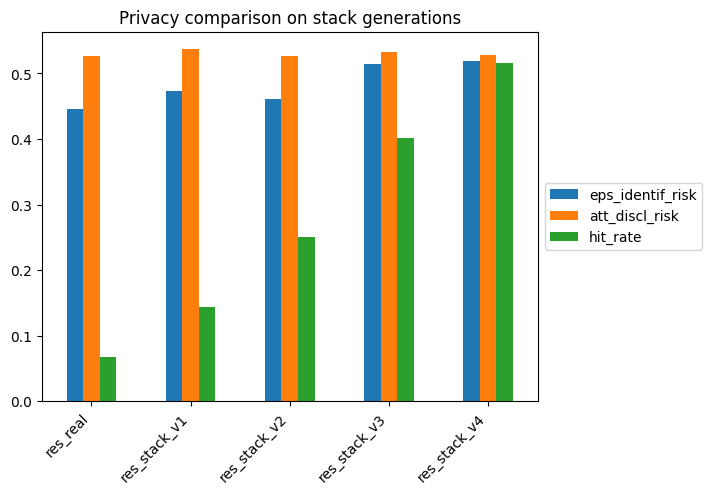

In [14]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.037268,0.156649,0.101064
res_stack_v1,0.021330,0.059707,0.030390
res_stack_v2,0.018645,0.026280,0.027035
res_stack_v3,0.025520,0.036376,0.054416
res_stack_v4,0.005918,0.038948,0.048316


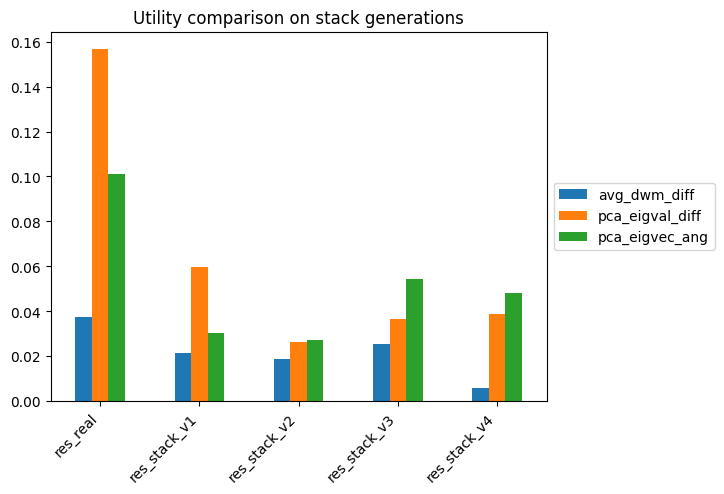

In [16]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [17]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.933728,0.640061
res_stack_v1,0.434240,0.206427
res_stack_v2,0.292253,0.205387
res_stack_v3,0.292611,0.207922
res_stack_v4,0.238741,0.185694


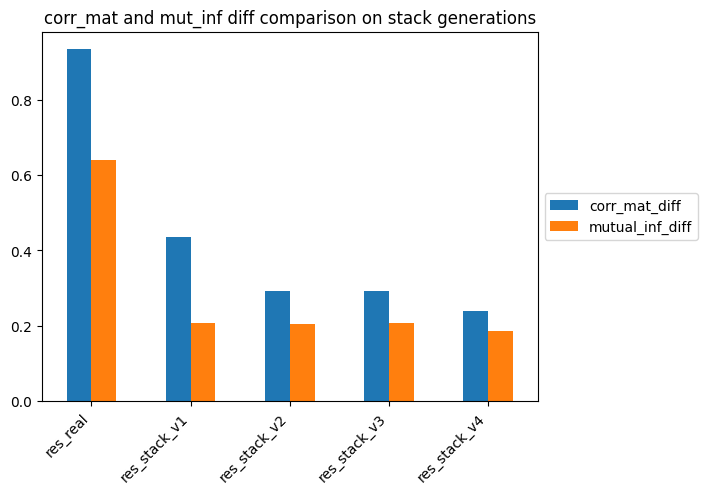

In [18]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [19]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.037268,0.156649,0.101064,0.142583,0.933728,0.640061,0.090186,0.571429,0.010262,0.007816,0.77692,0.003391,0.547736,0.059478,0.044864,0.074627,0.067416,0.445693,1.000000,0.526518
res_stack_v1,0.021330,0.059707,0.030390,0.287321,0.434240,0.206427,0.058466,0.285714,0.098853,0.002448,NaN,NaN,0.518143,0.014692,0.021539,0.024254,0.144195,0.473783,0.991045,0.536997
res_stack_v2,0.018645,0.026280,0.027035,0.195809,0.292253,0.205387,0.053227,0.714286,0.016856,0.003289,NaN,NaN,0.511959,0.008998,0.030903,0.019590,0.250000,0.460674,0.982090,0.527053
res_stack_v3,0.025520,0.036376,0.054416,0.087076,0.292611,0.207922,0.048979,0.714286,0.099531,0.003415,NaN,NaN,0.477506,0.056700,0.008071,0.013084,0.401029,0.514272,0.971642,0.532774
res_stack_v4,0.005918,0.038948,0.048316,0.542638,0.238741,0.185694,0.028831,0.571429,0.003228,0.000629,NaN,NaN,0.493928,0.027650,0.009942,0.015903,0.516023,0.519298,0.983551,0.528657


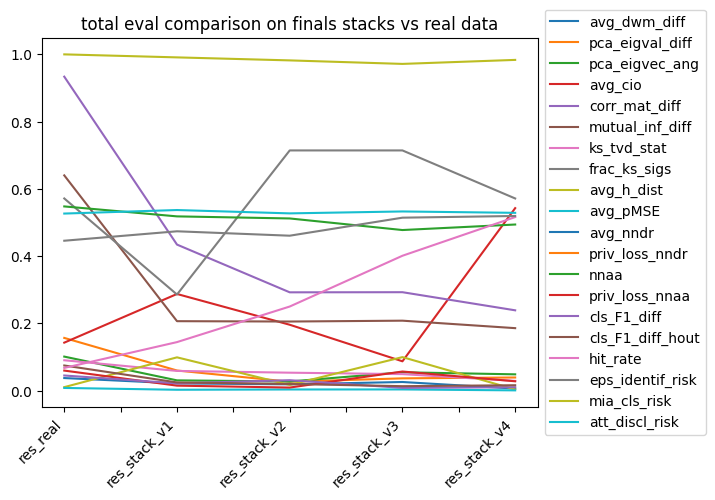

In [20]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.805476,0.691707
1,res_stack_v1,0.857642,0.602812
2,res_stack_v2,0.827585,0.597819
3,res_stack_v3,0.816070,0.547624
4,res_stack_v4,0.872031,0.531299


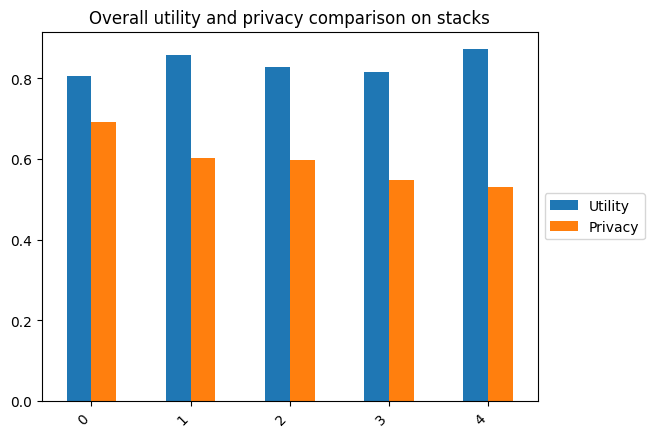

In [22]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [23]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [24]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.445693,0.526518,0.067416
res_stack_v5_on_real,0.438202,0.522241,0.037453
res_stack_synth_only_on_real,0.352060,0.509410,0.033708


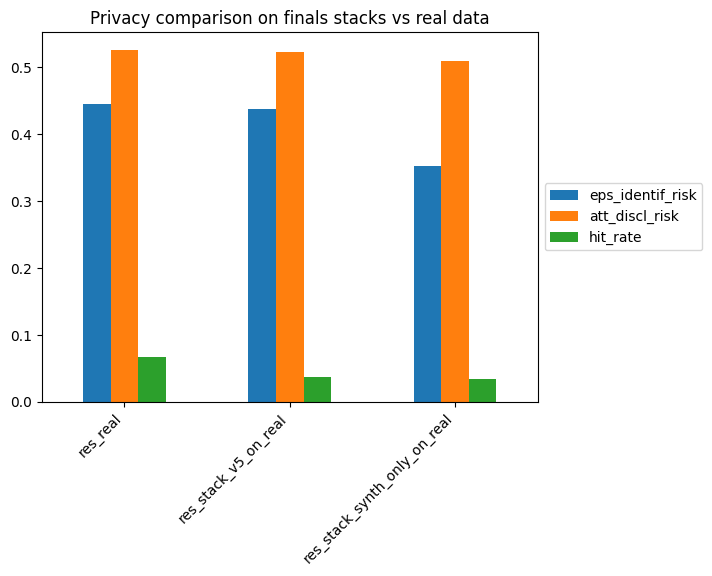

In [25]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [26]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.037268,0.156649,0.101064
res_stack_v5_on_real,0.020863,0.197154,0.114947
res_stack_synth_only_on_real,0.016866,0.121032,0.014391


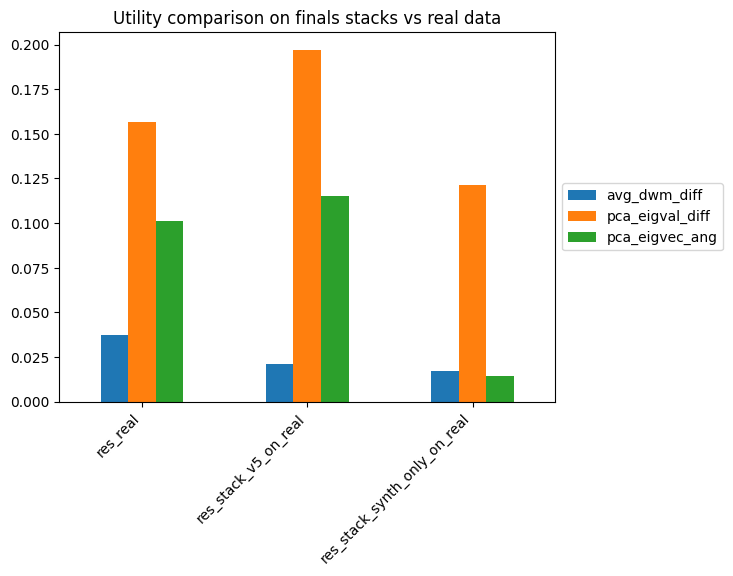

In [27]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [28]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.933728,0.640061
res_stack_v5_on_real,1.124228,0.578245
res_stack_synth_only_on_real,0.906183,0.558914


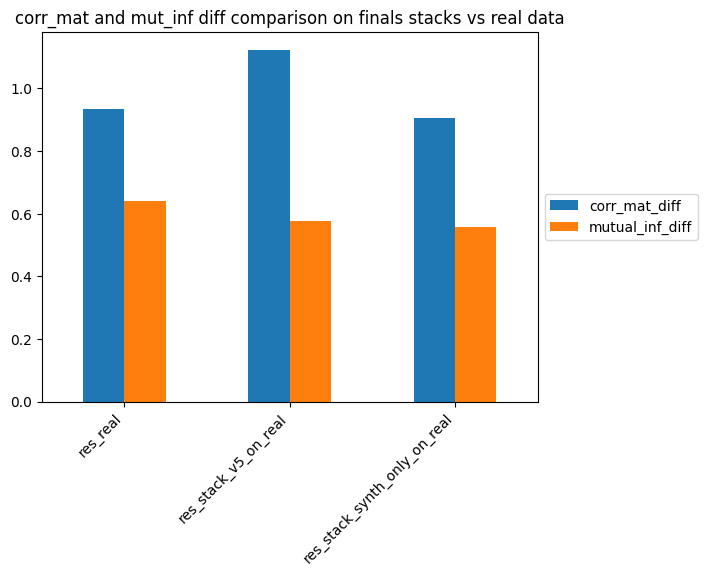

In [29]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [30]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.037268,0.156649,0.101064,0.142583,0.933728,0.640061,0.090186,0.571429,0.010262,0.007816,0.776920,0.003391,0.547736,0.059478,0.044864,0.074627,0.067416,0.445693,1.000000,0.526518
res_stack_v5_on_real,0.020863,0.197154,0.114947,0.348840,1.124228,0.578245,0.079573,0.000000,0.109238,0.003587,0.773917,0.018017,0.597888,0.052112,0.056184,0.070896,0.037453,0.438202,0.982353,0.522241
res_stack_synth_only_on_real,0.016866,0.121032,0.014391,0.419431,0.906183,0.558914,0.092113,0.571429,0.109183,0.003270,0.815488,0.002462,0.689239,-0.054165,0.055294,0.082090,0.033708,0.352060,0.982353,0.509410


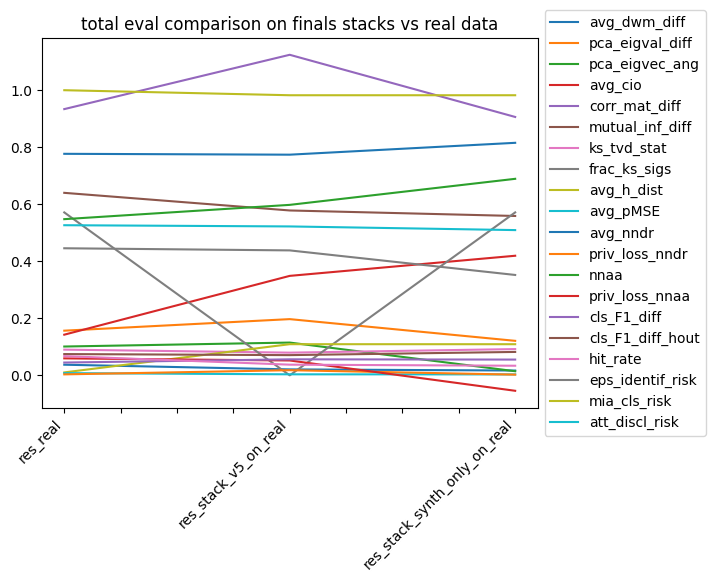

In [31]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [32]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.805476,0.691707
1,res_stack_v5_on_real,0.852695,0.702215
2,res_stack_synth_only_on_real,0.814981,0.722662


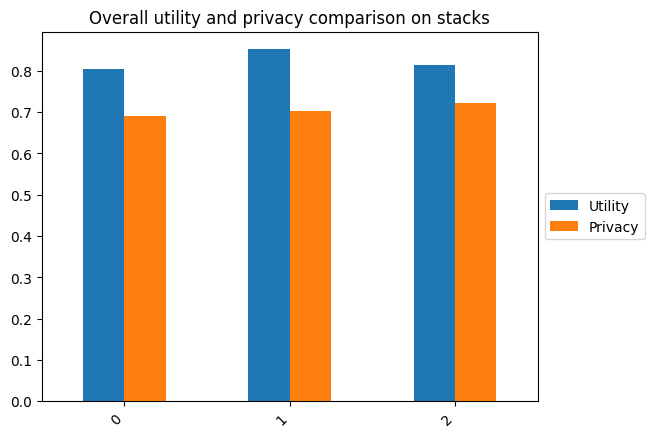

In [33]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()